Question 1

In [ ]:
n = 100
means = NULL
upper_var = NULL
lower_var = NULL

h = function(x) {
    return ((cos(50*x) + sin(20*x))^2)
}

std_dev = function(x,m) {
  var = (1/m)*mean((x - mean(x))^2)
  return (sqrt(var))
}

real_value = function() {
  return (integrate(h, lower = 0, upper = 1))
}

ms <- seq(100, 20000, length = 30)

for (m in ms) {

  # x = runif(m)
  x = rbeta(m, 0.1, 2)
  w = h(x)/dbeta(x,0.1,2)
  means = c(means, mean(w))
  upper_var = c(upper_var, mean(w)+std_dev(w,m))
  lower_var = c(lower_var, mean(w)-std_dev(w,m))
  
}

In [ ]:
real_value()

0.9652009 with absolute error < 1.9e-10

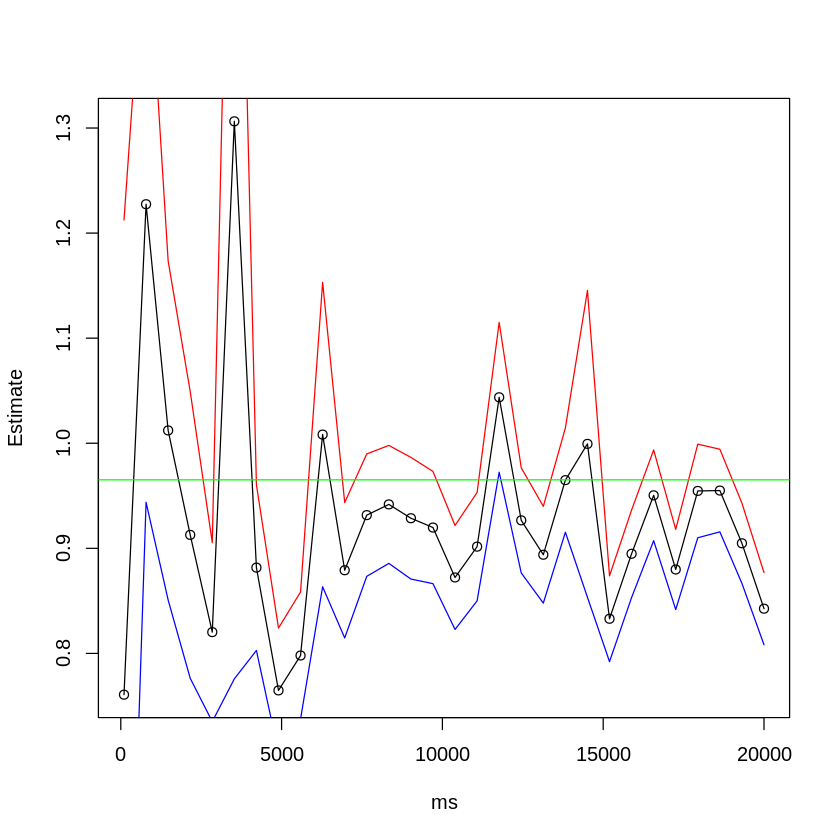

In [ ]:
plot(ms, means, col = 'black', ylab = 'Estimate')
lines(ms, lower_var, col = 'blue')
lines(ms, means, col = 'black')
lines(ms, upper_var, col = 'red')
abline(h = 0.9652009, col = 'green')

Question 4

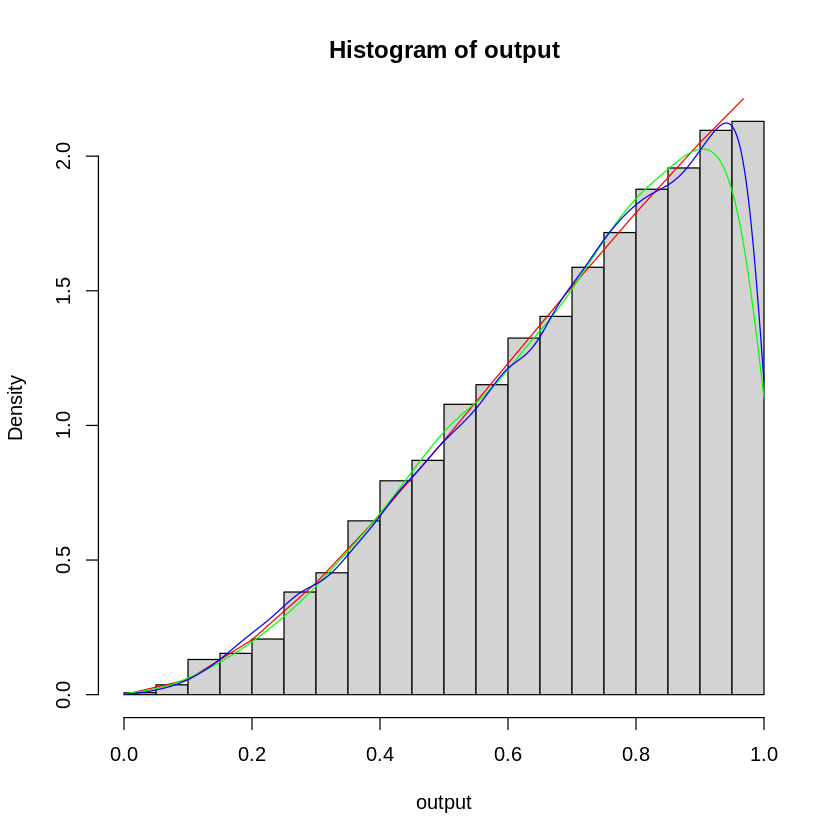

In [ ]:
output = NULL
n = 10000

f = function(x) {
  return (x^2 * exp(-x))
}

g = function() {
  return (1-0)
}

importance_sampling = function (x) {
  wTilde=f(x) # get weights 
  return (wTilde/sum(wTilde)) # normalize weights
}

importance_sampling2 = function (x) {
  wTilde=f(x)/dbeta(x, 3, 1) # get weights 
  return (wTilde/sum(wTilde)) # normalize weights
}


while (length(output) < n) {
  x = runif(n)
  K = exp(-1)
  y = runif(n, 0, K*g())

  # append accepted values
  output = c(output, x[y<=f(x)])
}

hist(output, probability = T)
x = seq(0.0, 1000, length = n)
y = dgamma(x,3,1)/pgamma(1,3,1)
lines(x, y, col = 'red')


y=runif(n)
W=importance_sampling(y)
d=density(y,weights=W,from=0,to=1) 
lines(d,col='green')



# (c)
z=rbeta(n, 3, 1)
W=importance_sampling2(z)
d=density(z,weights=W,from=0,to=1) 
lines(d,col='blue')

# beta(3,1) was better. This curve estimates f(x) better than than a uniform distribution.


redo

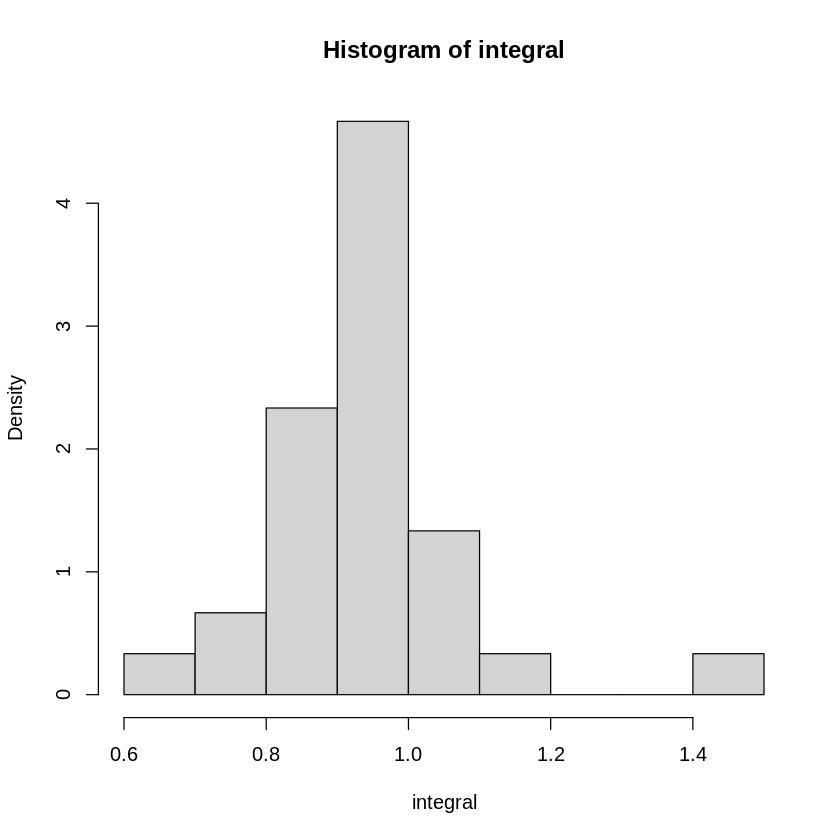

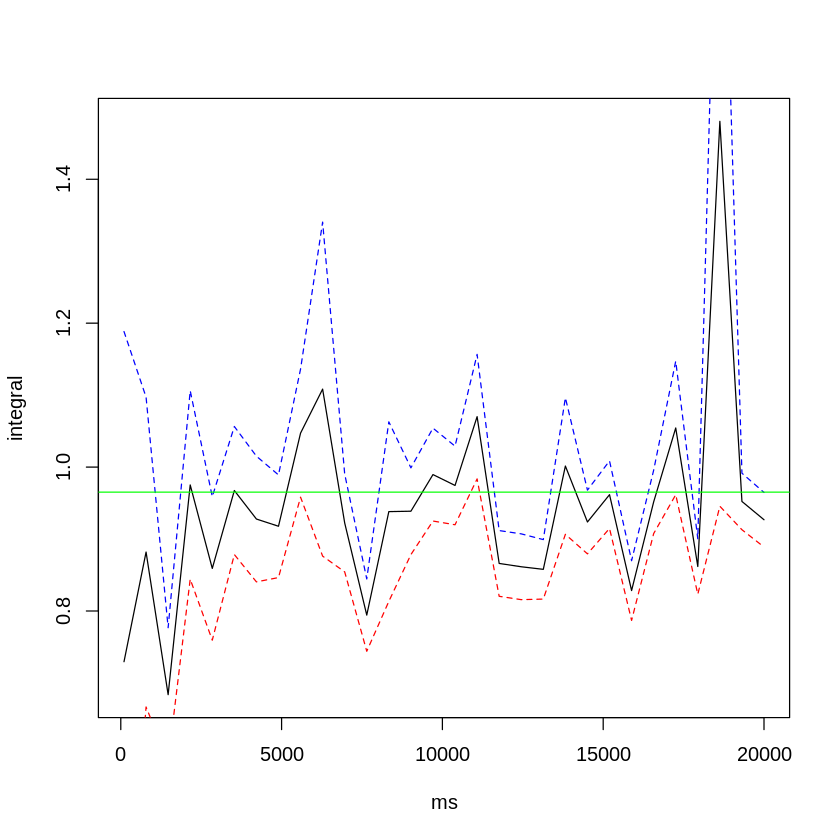

In [ ]:
ms <- seq(100, 20000, length = 30)

variance_upper = NULL
variance_lower = NULL
integral = NULL

h = function(x) {
  (cos(50*x) + sin(20*x))^2
}

v = function(x, m) {
  sqrt((1/m^2)*sum((x - mean(x))^2))
}

real_value = function() {
  integrate(h, lower = 0, upper = 1)
}

for (m in ms) {

  # importance sampling
  y = rbeta(m, 0.1, 2)
  w = h(y)/dbeta(y, 0.1, 2)

  # cat("mean(w) is ", mean(w), '\n')
  # cat("v(w, m) is ", v(w, m), '\n')

  integral = c(integral, mean(w))
  variance_upper = c(variance_upper, mean(w) + v(w, m))
  variance_lower = c(variance_lower, mean(w) - v(w, m))

}


hist(integral, prob = T)

plot(ms, integral, type = 'l', col = 'black')
lines(ms, variance_upper, col = 'blue', lty = 2)
lines(ms, variance_lower, col = 'red', lty = 2)
abline(h = real_value()[1], col= 'green')

In [ ]:
sqrt((1/m^2)*sum((x - mean(x))^2))
var = (1/m^2)*sum((x - mean(x))^2)
sqrt(var)

[1] 0.000850807

[1] 0.000850807

In [ ]:
# lab 3 method is more efficient

question 2

importance mean is  0.1594516 
1/sum(w_norm^2) mean is  646.7093 


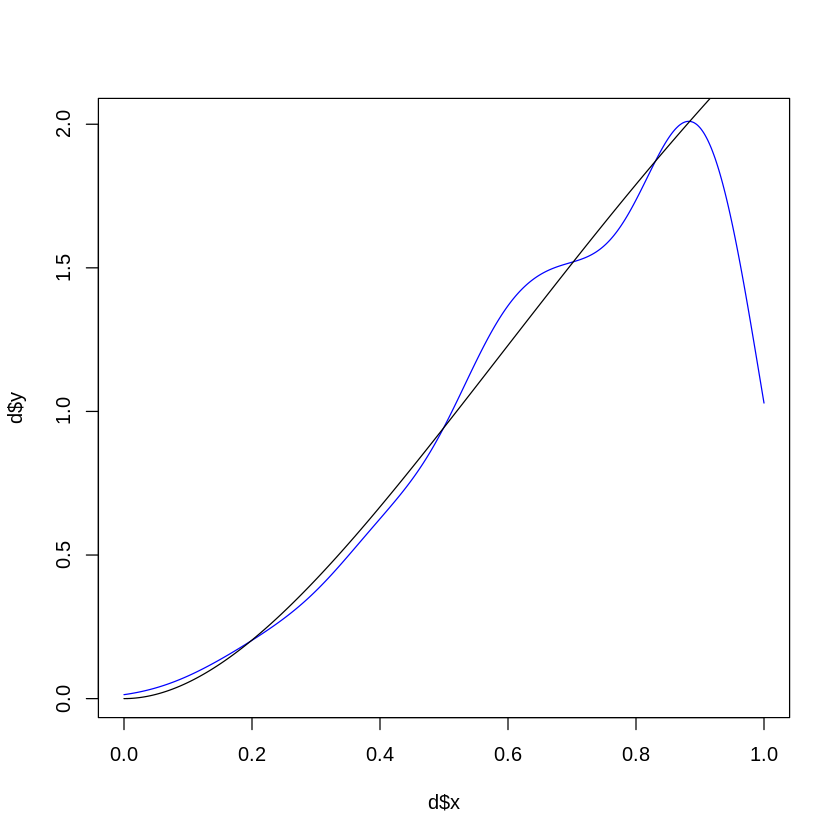

In [ ]:
n = 1e3
K = exp(-1)

f = function(x) {
  x^2 * exp(-x)
}
g = function() {
  runif(n, min = 0, max = 1)
}

comparison = function(x) {
  dgamma(x, 3, 1)/pgamma(1, 3, 1)
}

# importance
y = g()
w = f(y)/dunif(y, min = 0, max = 1)
cat ('importance mean is ', mean(w), '\n')
w_norm = w/sum(w)
cat ('1/sum(w_norm^2) mean is ', 1/sum(w_norm^2), '\n')

d = density(y, weights= w_norm, from = 0, to = 1)
plot(d$x, d$y, type = 'l', col = 'blue')

# true
x = seq(0,1, length = n)
lines(x, comparison(x), col = 'black')

rejection mean is  0.6353331 


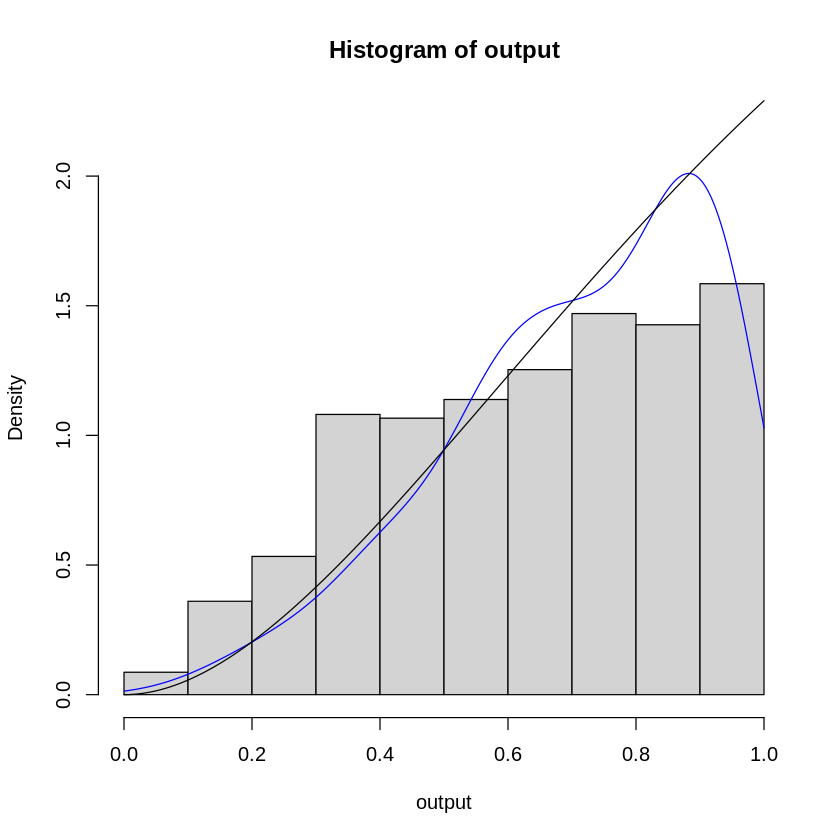

In [ ]:
# (b)
# rejection
output = NULL
for (i in 1:n) {
  y = runif(1, 0, K*g())
  x = runif(1)
  if(y<=f(x)) {
    output = c(output, x)
  }
}
cat ('rejection mean is ', mean(output), '\n')


hist(output, prob = T, ylim = c(0, 1.1*max(d$y))) # rejection
lines(d$x, d$y, type = 'l', col = 'blue') # importance
x = seq(0,1, length = n)
lines(x, comparison(x), col = 'black') # true

importance mean is  0.1609679 
1/sum(w_norm^2) mean is  955.6811 


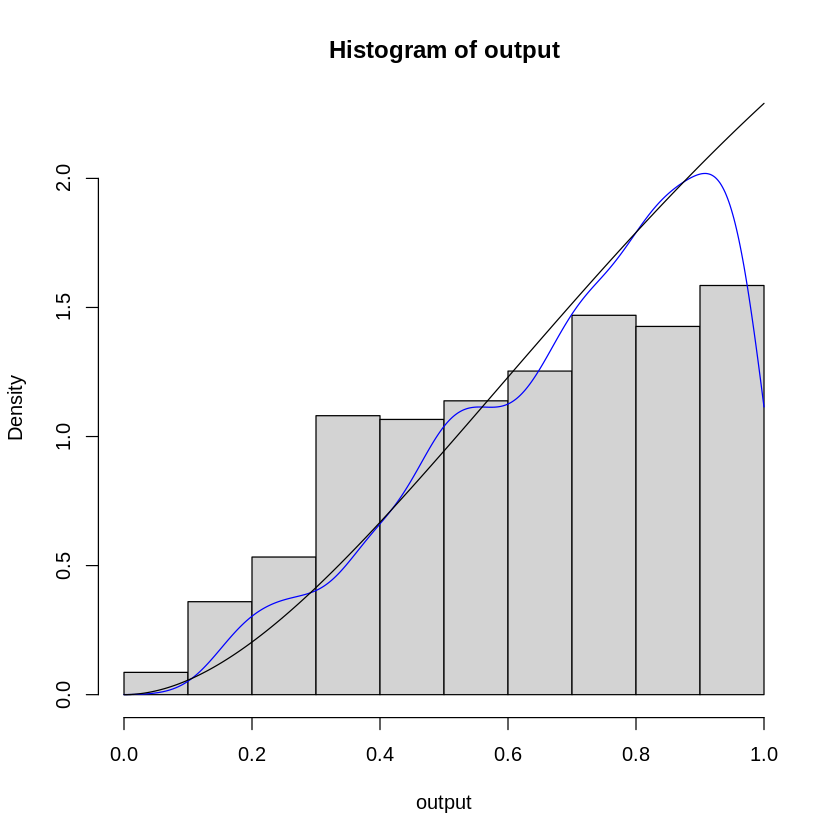

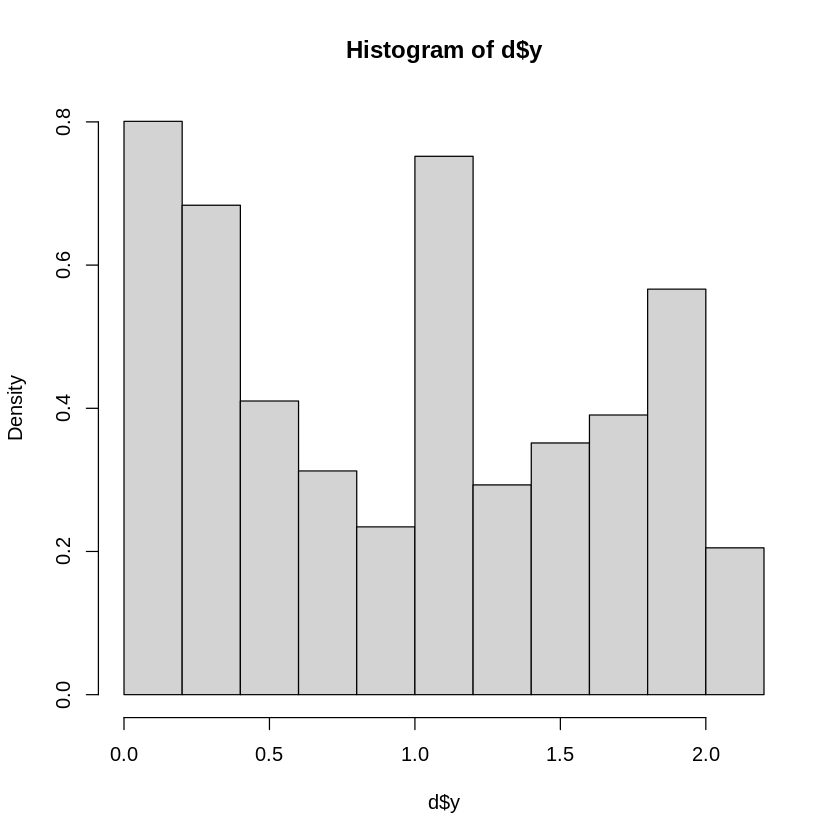

In [ ]:
# (c)

g = function() {
  rbeta(n, 3, 1)f
}

# importance
y = g()
w = f(y)/dbeta(y, 3, 1)
cat ('importance mean is ', mean(w), '\n')
w_norm = w/sum(w)
cat ('1/sum(w_norm^2) mean is ', 1/sum(w_norm^2), '\n')
d = density(y, weights= w_norm, from = 0, to = 1)


hist(output, prob = T, ylim = c(0, 1.1*max(d$y))) # rejection
lines(d$x, d$y, type = 'l', col = 'blue') # importance plot
x = seq(0,1, length = n)
lines(x, comparison(x), col = 'black') # true

In [ ]:
# the beta(3, 1) distribution seems to stick to the true curve (black curve) more closely. Thus this sampling distribution seems better. 

# additionally, the ESS for beta(3, 1) is 956.6797. This is higher than the ESS for the uniform distribution. 